# Xgboost prueba 4

### Importamos las librerías

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import xgboost as xgb

### Leemos los archivos

In [30]:
df_train_labels = pd.read_csv('train_labels.csv')
df_train_values = pd.read_csv('train_values_FE.csv')

#### Eliminamos el building id para pdoer hacer las predicciones

In [31]:
df_train_labels_filtrados = df_train_labels.drop(['building_id'], axis=1)
df_train_values_filtrados = df_train_values.drop(['building_id'], axis=1)

#### Implementamos el algoritmo

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_values_filtrados, df_train_labels_filtrados, test_size=0.3, random_state=123)

In [33]:
xg_reg = xgb.XGBClassifier(objective ='multi:softprob', n_estimators = 700, max_depth = 8,     learning_rate = 0.1,     subsample = 0.5,     colsample_bytree=0.7)

In [34]:
xg_reg.fit(X_train, y_train)

[20:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
preds = xg_reg.predict(X_test)

In [36]:
error = f1_score(y_test, preds, average='micro')
error

0.701692227011678

### Error de entrenamiento

In [37]:
xg_reg.score(X_train, y_train)

0.7645159521982239

### Error de generalización o testing

In [38]:
xg_reg.score(X_test, y_test)

0.701692227011678

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

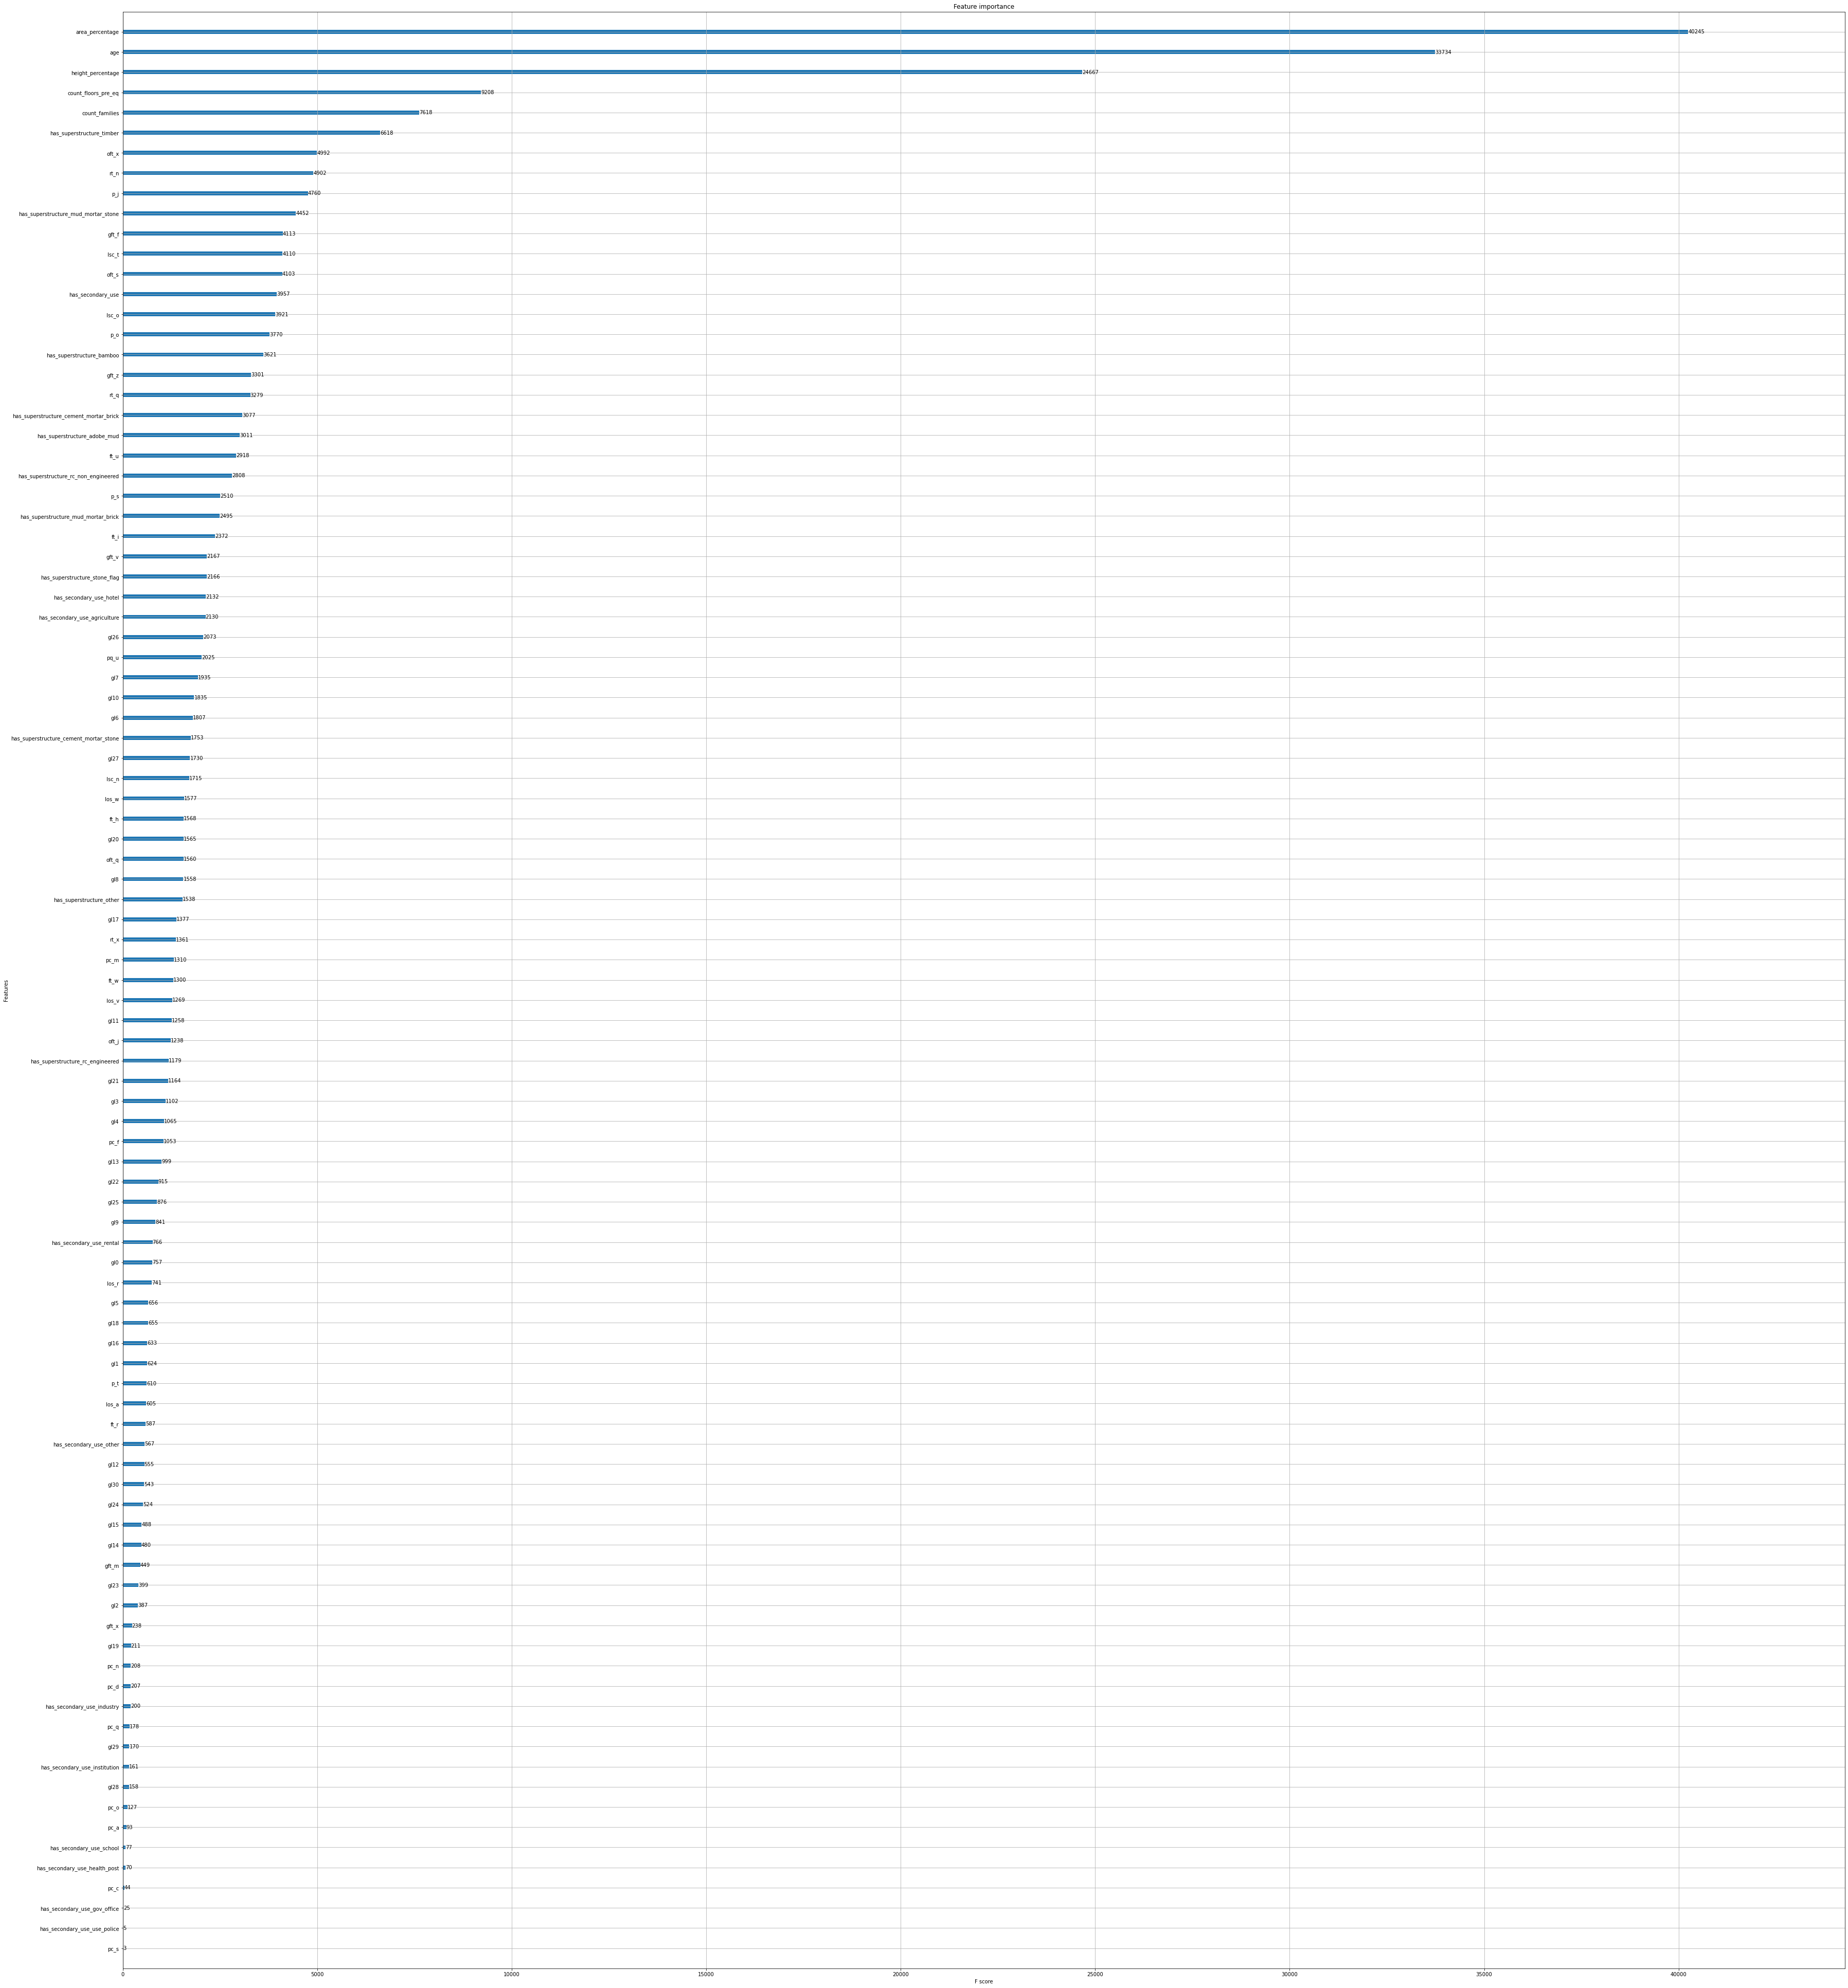

In [39]:
plt.rcParams['figure.figsize'] = [60, 70]
xgb.plot_importance(xg_reg)

### Prueba de los datos de test

In [40]:
df_test_values = pd.read_csv('test_values_FE.csv')
df_test_values_filtrados = df_test_values.drop(['building_id'], axis=1)

In [41]:
preds = xg_reg.predict(df_test_values_filtrados)
preds

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [42]:
my_df = pd.DataFrame(preds)
my_df['building_id'] = df_test_values['building_id']
my_df = my_df.rename(columns={0: 'damage_grade'})[['building_id', 'damage_grade']]
my_df = my_df.set_index(['building_id', 'damage_grade'])
my_df

,
building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
...,...
310028,2
663567,3
1049160,2


In [43]:
my_df.to_csv('prueba.csv')